# <font color='red'>Bank Marketing Prediction</font>

## Importing Libraries

In [108]:
import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the Data

In [109]:
df = pd.read_csv("C:\\Users\\Sasi\\Desktop\\data science\\Machine learning\\Project 1 bank\\bank-marketing.csv")

In [110]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [111]:
df.shape #shape of the data

(45211, 19)

In [112]:
df.info() #checking null values and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [113]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [114]:
print("pdays greater than 400: ",len (df[df['pdays'] >400] ) / len(df) * 100)
print("pdays less than 0:     ",len (df[df['pdays'] <0] ) / len(df) * 100)

pdays greater than 400:  0.5175731569750724
pdays less than 0:      81.73674548229414


#### Inference:
* above 400 pdays has only 0.5%
* less than zero pdays has 81%
* from the pdays most of the values are -1 (missing data) 
* days cannot be negative 

## Step 2 : Data Cleaning and Preparation

In [115]:
print('Total number of null values:',df.isnull().sum().sum()) #Checking null values

Total number of null values: 0


In [116]:
dup = df.duplicated() #Checking duplicates values
print('Duplicate values :',dup.sum())

Duplicate values : 0


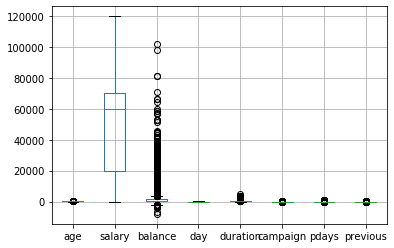

In [117]:
df.boxplot()# checking for the outliers
plt.show()

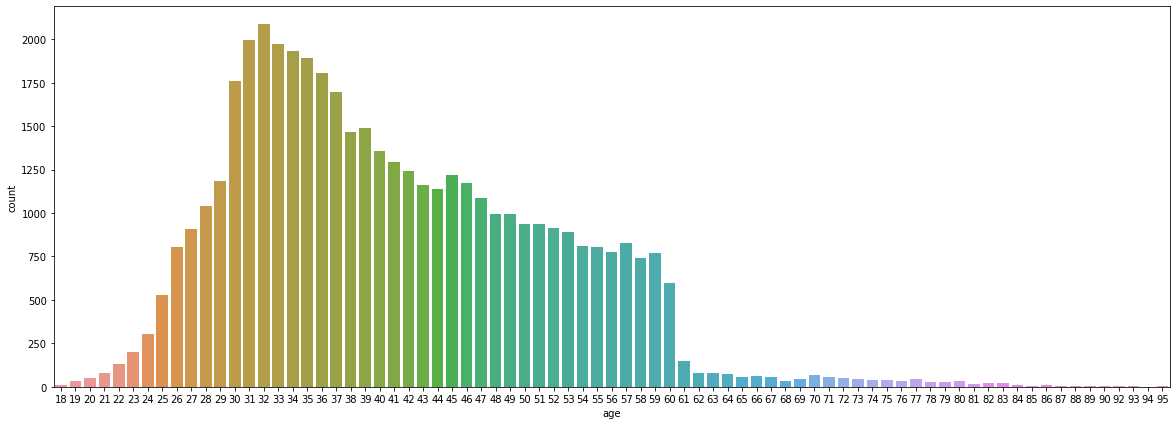

In [118]:
plt.figure(figsize=(20,7))
sns.countplot(x = 'age', data = df)
plt.show()

In [119]:
def remove_outliers(col): #Removing outliers in age column
    sorted(col)
    Q1,Q3 =col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range,upper_range
lower,upper = remove_outliers(df['age'])
print('lower value :',lower ,'Upper value :', upper)
df.drop(df[df.age >upper ].index, inplace = True)
df.drop(df[df.age <lower ].index, inplace = True)
print(df.shape)

lower value : 10.5 Upper value : 70.5
(44724, 19)


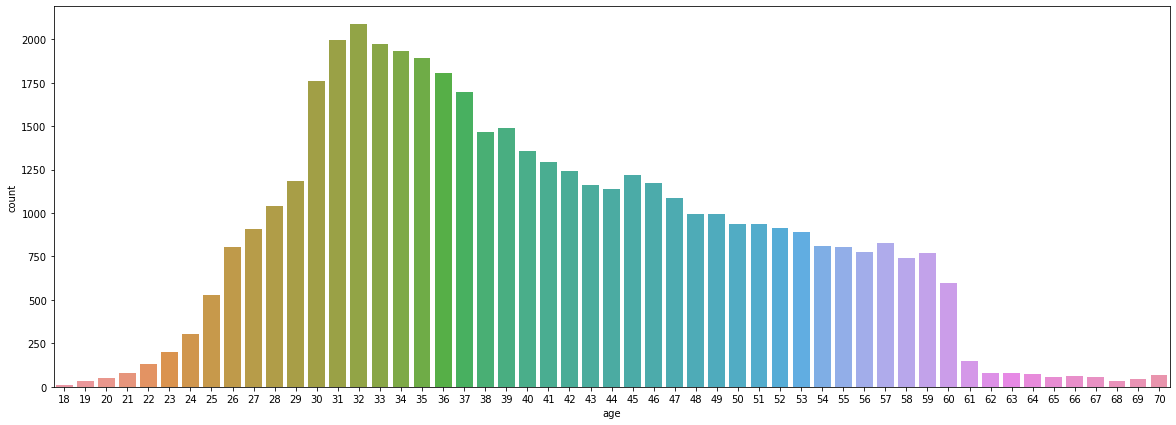

In [120]:
plt.figure(figsize=(20,7))
sns.countplot(x = 'age', data = df)
plt.show()

### Inference:
* Removing outliers for age column


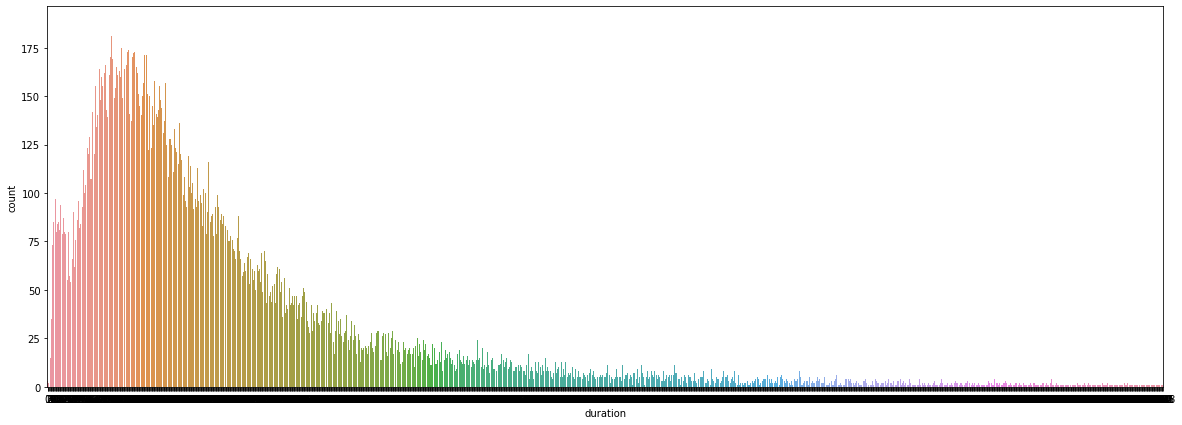

In [121]:
plt.figure(figsize=(20,7))
sns.countplot(x = 'duration', data = df)
plt.show()

In [122]:
def remove_outliers(col): #Removing outliers in duration column
    sorted(col)
    Q1,Q3 =col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range,upper_range
lower,upper = remove_outliers(df['duration'])
print('lower value :',lower ,'Upper value :', upper)
df.drop(df[df.duration >upper ].index, inplace = True)
df.drop(df[df.duration <lower ].index, inplace = True)
print(df.shape)

lower value : -219.5 Upper value : 640.5
(41507, 19)


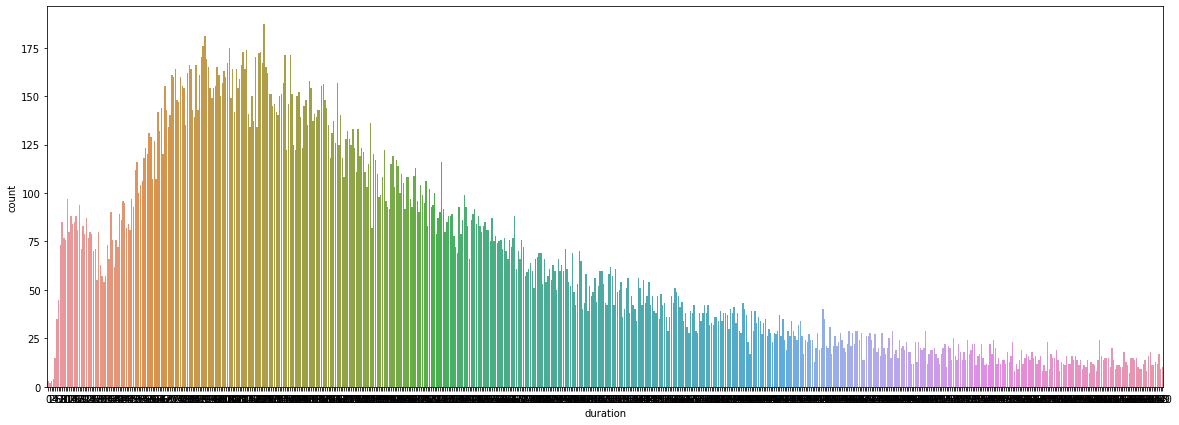

In [123]:
plt.figure(figsize=(20,7))
sns.countplot(x = 'duration', data = df)
plt.show()

### Inference:
* Removing outliers for duration column

## Step 3: Visualizing the data

In [124]:
categorical = df.select_dtypes(include = 'object').columns
for i in categorical:
    print(i)

job
marital
education
targeted
default
housing
loan
contact
month
poutcome
response


### Job, Marital, Education, Poutcome

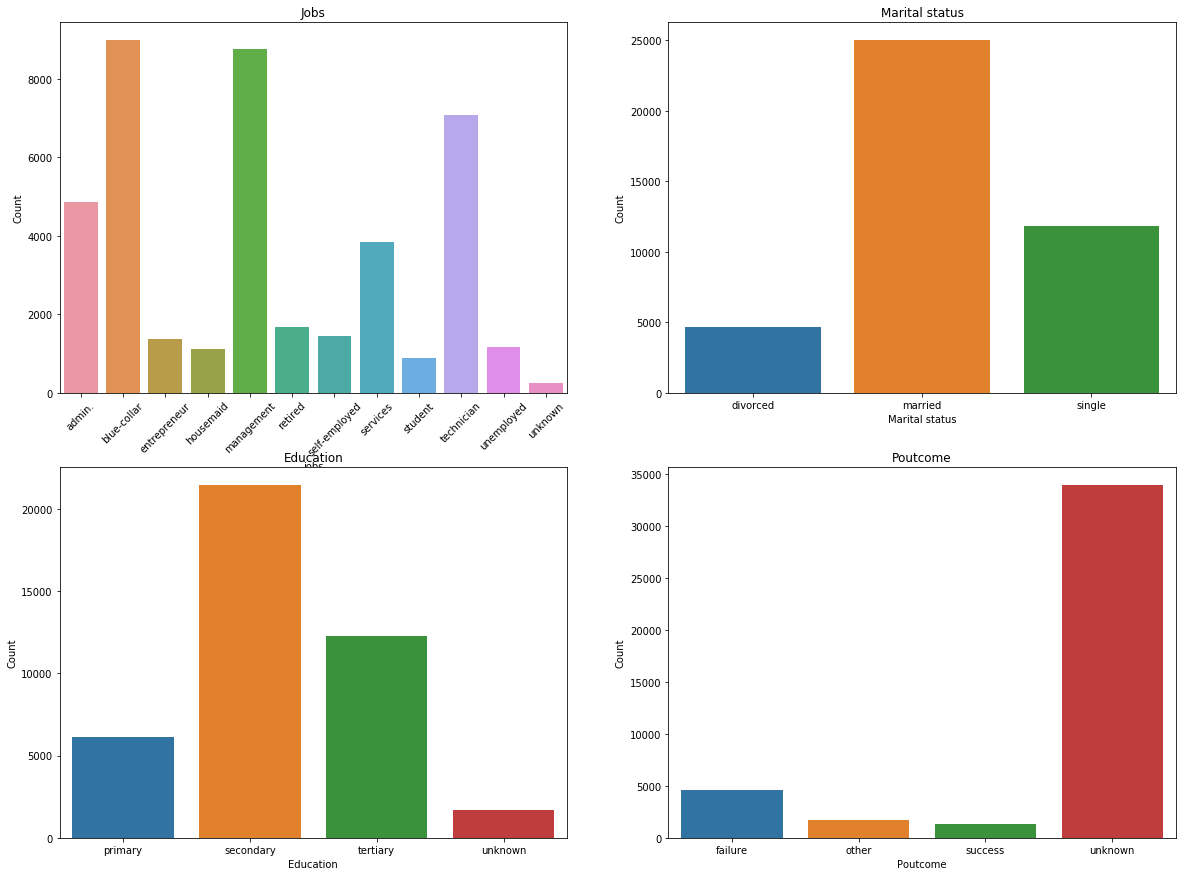

In [125]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (20,15))
j = df.groupby('job').job.count()
x1 = j.index.tolist()
y1 = j.values.tolist()
chart = sns.barplot(x1 ,y1 ,data = df, ax = ax[0,0])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set(xlabel='jobs', ylabel='Count', title='Jobs')


m = df.groupby('marital').marital.count()
x2 = m.index.tolist()
y2 = m.values.tolist()
chart2 = sns.barplot(x2 ,y2 ,data = df, ax = ax[0,1])
chart2.set(xlabel='Marital status', ylabel='Count', title='Marital status')

e= df.groupby('education').education.count()
x3 = e.index.tolist()
y3 = e.values.tolist()
chart3 = sns.barplot(x3 ,y3 ,data = df,ax = ax[1,0])
chart3.set(xlabel='Education', ylabel='Count', title='Education')

p= df.groupby('poutcome').poutcome.count()
x4 = p.index.tolist()
y4 = p.values.tolist()
chart4 = sns.barplot(x4 ,y4 ,data = df,ax = ax[1,1])
chart4.set(xlabel='Poutcome', ylabel='Count', title='Poutcome')
plt.show()


### Inference:
* Top jobs in dataset are blue-collar, management, technician
* Most of the customer Marital status is married
* Most of the customer education level is secondary
* Most of the Poutcome values are unknown 

### Targeted, Default, Housing, Loan

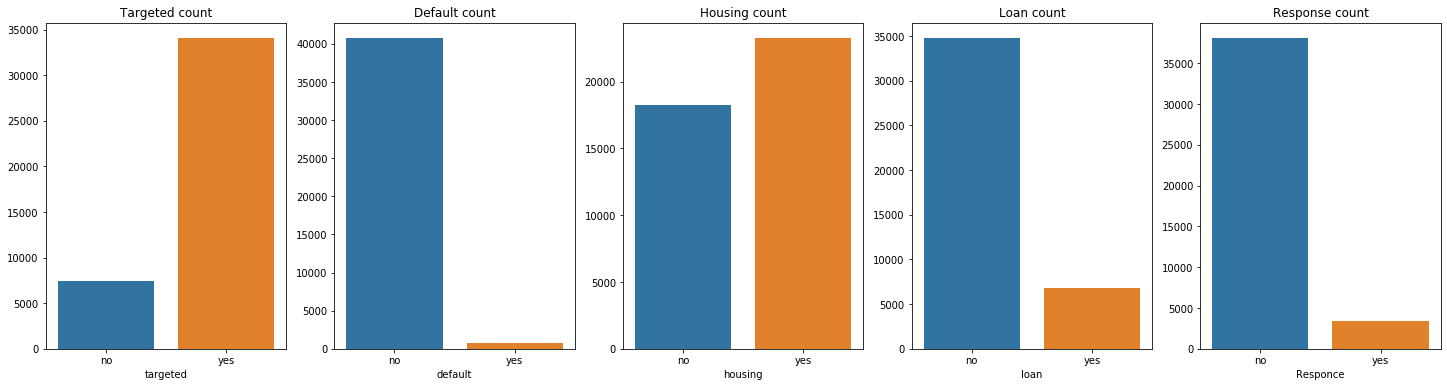

In [126]:
fig, ax = plt.subplots(nrows = 1 ,ncols = 5,figsize = (25,6))
T = df.groupby('targeted').targeted.count()
x1 = T.index.tolist()
y1 = T.values.tolist()
chart = sns.barplot(x1 ,y1 ,data = df, ax = ax[0])
chart.set(xlabel='targeted', title='Targeted count')


d = df.groupby('default').default.count()
x2 = d.index.tolist()
y2 = d.values.tolist()
chart2 = sns.barplot(x2 ,y2 ,data = df, ax = ax[1])
chart2.set(xlabel='default', title='Default count')

h= df.groupby('housing').housing.count()
x3 = h.index.tolist()
y3 = h.values.tolist()
chart3 = sns.barplot(x3 ,y3 ,data = df,ax = ax[2])
chart3.set(xlabel='housing', title='Housing count')

l= df.groupby('loan').loan.count()
x4 = l.index.tolist()
y4 = l.values.tolist()
chart4 = sns.barplot(x4 ,y4 ,data = df,ax = ax[3])
chart4.set(xlabel='loan', title='Loan count')

r= df.groupby('response').response.count()
x5 = r.index.tolist()
y5 = r.values.tolist()
chart5 = sns.barplot(x5 ,y5 ,data = df,ax = ax[4])
chart5.set(xlabel='Responce', title='Response count')
plt.show()

#### Inference:
* Many of the customers are targeted
* Default cutomers are very less
* Housing of the customers are 40:60 ratio
* Many of the customers don't have loan
* Majority of response are "NO"

### Days, Month, Contact

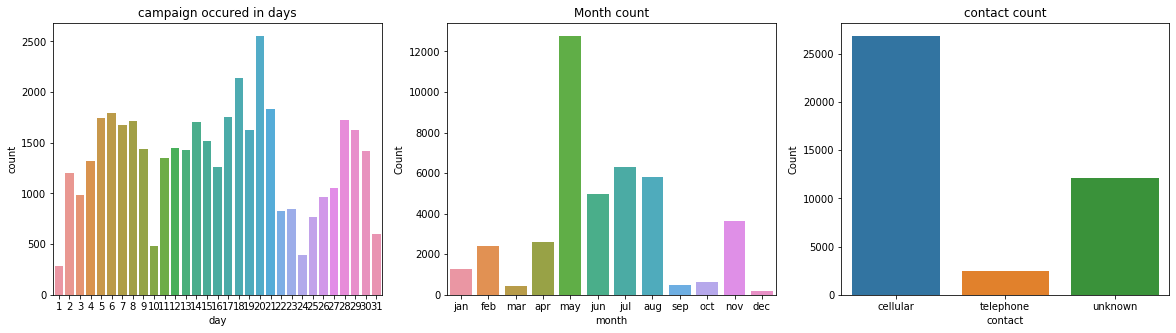

In [127]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20,5))

sns.countplot(x = 'day', data = df, ax = ax[0]).set(title = 'campaign occured in days')

mon = df.groupby('month').month.count()
x1 = mon.index.tolist()
y1 = mon.values.tolist()
chart = sns.barplot(x1 ,y1 ,data = df, ax = ax[1], order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
chart.set(xlabel='month', ylabel='Count', title='Month count')

con = df.groupby('contact').contact.count()
x2 = con.index.tolist()
y2 = con.values.tolist()
chart1 = sns.barplot(x2 ,y2 ,data = df, ax = ax[2])
chart1.set(xlabel='contact', ylabel='Count', title='contact count')
plt.show()

### Inference:
* Day 19 has more campaign are occured
* May month has more campaign are occured
* customers are contacted by cellular is highest

## Step 3.2 : Visualising Numerical Data

In [128]:
numeric = df.select_dtypes(include = np.number).columns
for i in numeric:
    print(i)

age
salary
balance
day
duration
campaign
pdays
previous


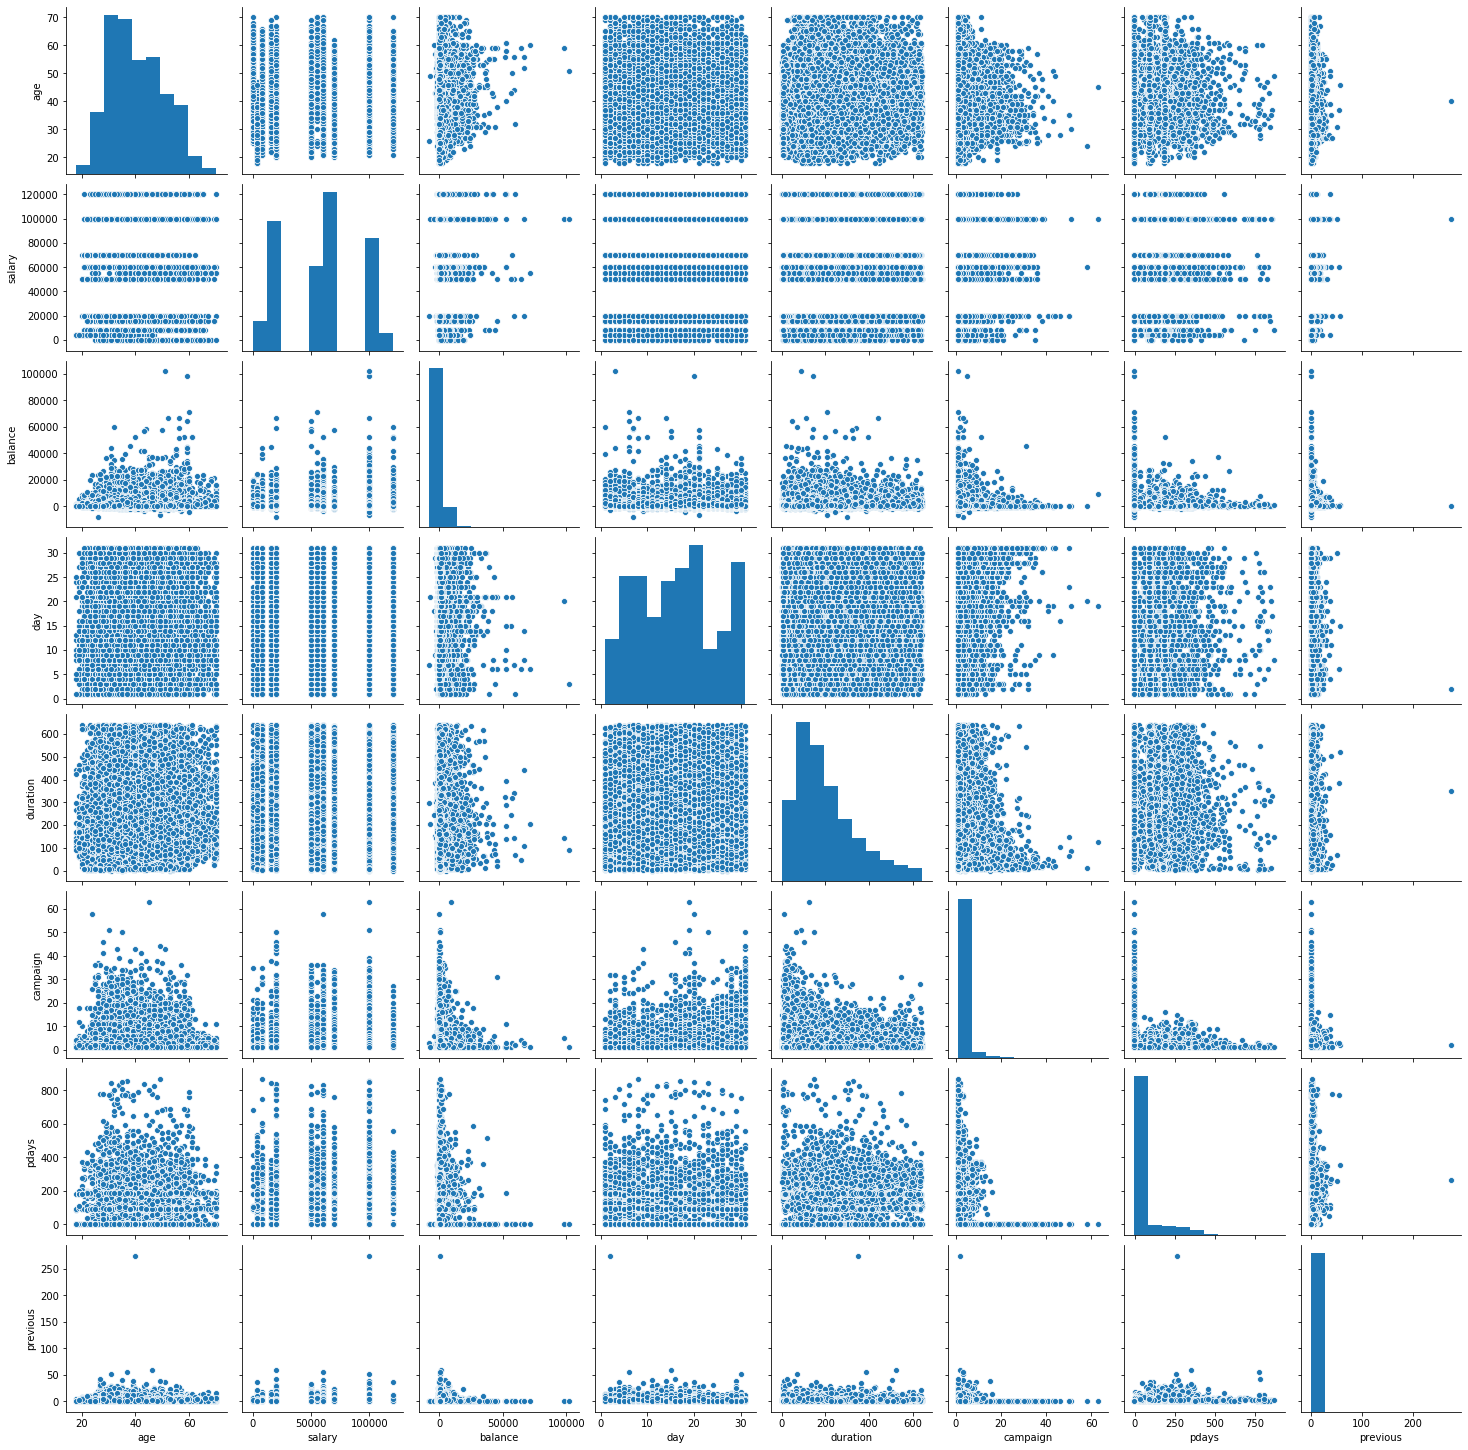

In [129]:
sns.pairplot(df)
plt.show()

## Step 3.3 : Visualising Bivariate analysis

### Job vs Response

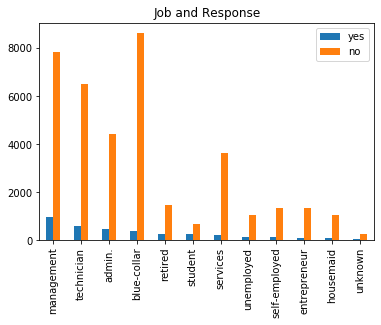

In [130]:
j_df = pd.DataFrame()
j_df['yes'] = df[df['response'] == 'yes']['job'].value_counts()
j_df['no'] = df[df['response'] == 'no']['job'].value_counts()
j_df.plot.bar(title = 'Job and Response')
plt.show()


### Inference:
* management, technician job customers are highly respond for the campaign

### Marital vs response

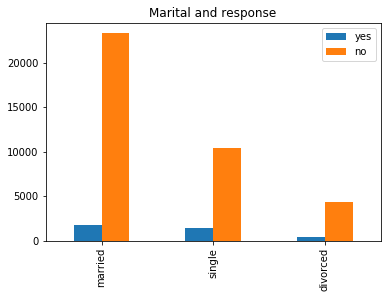

In [131]:
i_df = pd.DataFrame()
i_df['yes'] = df[df['response'] == 'yes']['marital'].value_counts()
i_df['no'] = df[df['response'] == 'no']['marital'].value_counts()
i_df.plot.bar(title = 'Marital and response')
plt.show()

### Inference:
* Married customers are highly responed

### Education vs response

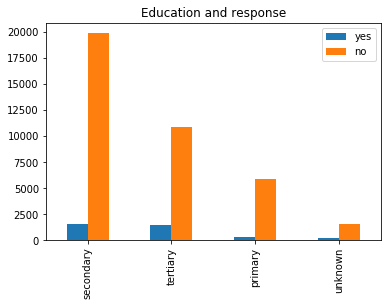

In [132]:
h_df = pd.DataFrame()
h_df['yes'] = df[df['response'] == 'yes']['education'].value_counts()
h_df['no'] = df[df['response'] == 'no']['education'].value_counts()
h_df.plot.bar(title = 'Education and response')
plt.show()

### Inference:
* Secondary education level are more responded among all

### Contact vs response

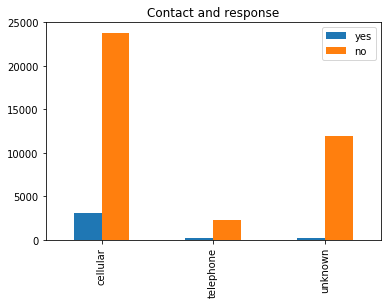

In [133]:
h_df = pd.DataFrame()
h_df['yes'] = df[df['response'] == 'yes']['contact'].value_counts()
h_df['no'] = df[df['response'] == 'no']['contact'].value_counts()
h_df.plot.bar(title = 'Contact and response')
plt.show()

### Inference:
* Contacted from cellular are high

### Campaign vs response

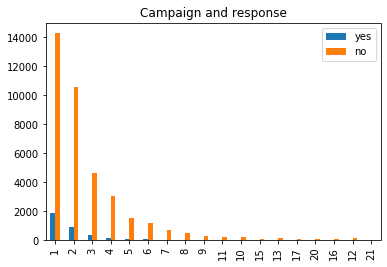

In [134]:
h_df = pd.DataFrame()
h_df['yes'] = df[df['response'] == 'yes']['campaign'].value_counts()
h_df['no'] = df[df['response'] == 'no']['campaign'].value_counts()
h_df.plot.bar(title = 'Campaign and response')
plt.show()

### Inference:
* First campaign has more response 
* Response is  gradually decresed by campaign by campaign

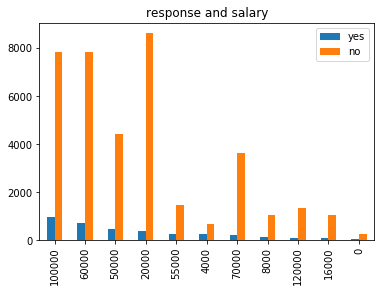

In [135]:
h_df = pd.DataFrame()
h_df['yes'] = df[df['response'] == 'yes']['salary'].value_counts()
h_df['no'] = df[df['response'] == 'no']['salary'].value_counts()
h_df.plot.bar(title = 'response and salary')
plt.show()

### Inference:
* One lakh salary customers are highly responded among all.

### Poutcome vs response

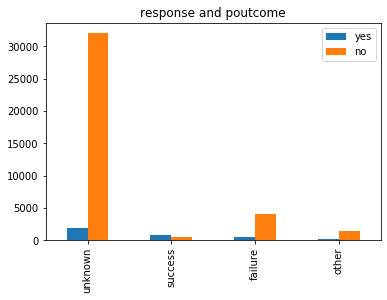

In [136]:
h_df = pd.DataFrame()
h_df['yes'] = df[df['response'] == 'yes']['poutcome'].value_counts()
h_df['no'] = df[df['response'] == 'no']['poutcome'].value_counts()
h_df.plot.bar(title = 'response and poutcome')
plt.show()

### Inference:
* Unknown customers are responded

### Education, Marital ,salary, campaign

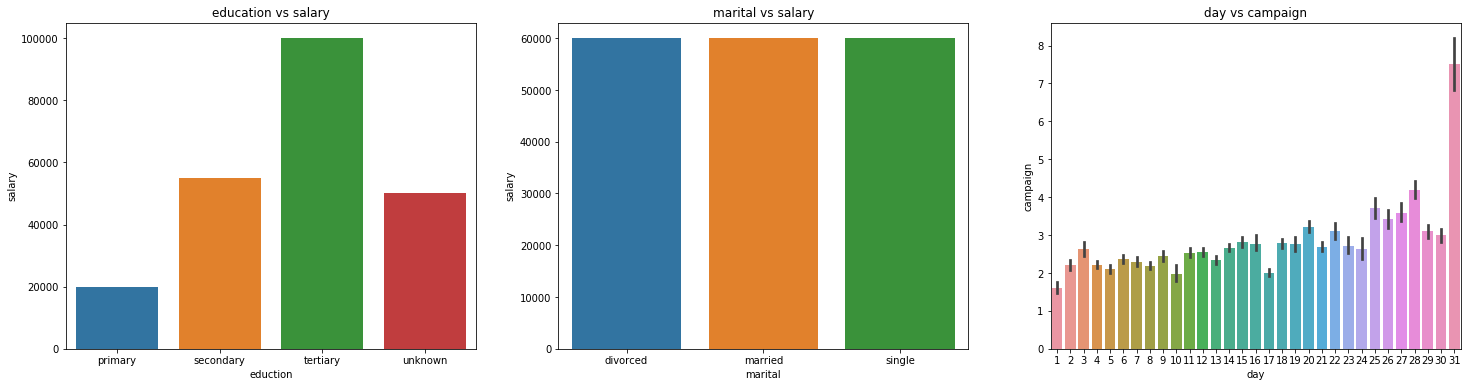

In [137]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (25,6))
e = df.groupby('education').salary.median()
x = e.index.tolist()
y = e.values.tolist()
chart = sns.barplot(x ,y ,data = df, ax = ax[0])
chart.set(xlabel='eduction', ylabel='salary', title='education vs salary')

m = df.groupby('marital').salary.median()
x1 = m.index.tolist()
y1 = m.values.tolist()
chart1 =sns.barplot(x1 ,y1 ,data = df,ax = ax[1])
chart1.set(xlabel='marital', ylabel='salary', title='marital vs salary')

sns.barplot(x = 'day', y = 'campaign',data = df, ax = ax[2]).set(title ='day vs campaign')
plt.show()

### Inerence:
* tertiary education level has high salary
* single, married, divorced has equal number of salaries
* More number of campaign are occured in 31 day

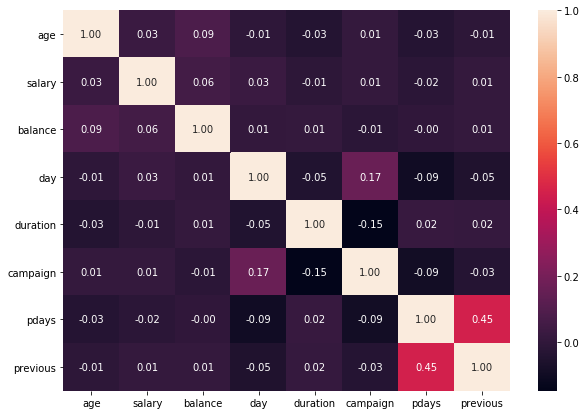

In [138]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot = True, fmt='.2f')

### Inference:
*  pdays and previous has high corelation (0.45)

## Step 4 : Deriving new features

In [139]:
df1 = df.copy()

In [140]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x],prefix=x, drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr
# df1 = dummies('duration_col',df1)
#df1 = dummies('age_col',df1)
df1 = dummies('job',df1)
df1 = dummies('marital',df1)
df1 = dummies('education',df1)
df1 = dummies('contact',df1)
df1 = dummies('month',df1)
df1 = dummies('targeted',df1)
df1 = dummies('default',df1)
df1 = dummies('housing',df1)
df1 = dummies('loan',df1)
df1 = dummies('response',df1)
df1 = dummies('poutcome',df1)

In [141]:
df1.columns

Index(['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'targeted_yes', 'default_yes', 'housing_yes',
       'loan_yes', 'response_yes', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

## Step 6 : Model Building

In [142]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

In [143]:
cols = ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'targeted_yes', 'default_yes', 'housing_yes',
       'loan_yes',  'poutcome_other', 'poutcome_success',
       'poutcome_unknown']
X = df1[cols]
y = df1['response_yes']
model = LogisticRegression()
rfe = RFE(model, 8)
rfe = rfe.fit(X, y)
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['contact_unknown', 'month_jan', 'month_jul', 'month_mar', 'month_oct', 'month_sep', 'housing_yes', 'poutcome_success']


In [144]:
X = df1[['contact_unknown', 'month_aug', 'month_jan', 'month_jul', 'month_mar', 'month_nov', 'housing_yes', 'poutcome_success']]
np.random.seed(0)
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state = 101)

In [145]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('contact_unknown', False, 29),
 ('month_aug', False, 37),
 ('month_jan', False, 36),
 ('month_jul', False, 30),
 ('month_mar', False, 31),
 ('month_nov', False, 22),
 ('housing_yes', False, 34),
 ('poutcome_success', False, 33)]

In [146]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.Logit(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

In [147]:
X_train_new = build_model(X_train,y_train)

Optimization terminated successfully.
         Current function value: inf
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           response_yes   No. Observations:                31130
Model:                          Logit   Df Residuals:                    31121
Method:                           MLE   Df Model:                            8
Date:                Mon, 14 Sep 2020   Pseudo R-squ.:                     inf
Time:                        21:01:52   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.3091      0.040    -32.950      0.000      -1.387      -1.231
contact_unknown 

In [148]:
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [149]:
checkVIF(X)

,Features,VIF
4,month_mar,0.40
1,month_aug,0.03
7,poutcome_success,0.03
3,month_jul,0.02
5,month_nov,0.02
6,housing_yes,0.02
0,contact_unknown,0.01
2,month_jan,0.01


### Logistic regression

In [162]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)
print('Accuracy for train data: ',accuracy_score(y_train, y_train_pred))
print('Accuracy for test data: ',accuracy_score(y_test, y_test_pred))

Accuracy for train data:  0.9244779955027305
Accuracy for test data:  0.9252192348462946


In [153]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

[[9387  152]
 [ 624  214]]


In [151]:
from sklearn.metrics import recall_score, precision_score, f1_score
#validating on train
print("recall   ",recall_score(y_train,y_train_pred))
print("precision",precision_score(y_train,y_train_pred))
print("f1       ",f1_score(y_train,y_train_pred))
print()
# validate on test
print("recall   ",recall_score(y_test,y_test_pred))
print("precision",precision_score(y_test,y_test_pred))
print("f1       ",f1_score(y_test,y_test_pred))

recall    0.2558586246638494
precision 0.6166666666666667
f1        0.361661688840619

recall    0.2553699284009546
precision 0.5846994535519126
f1        0.35548172757475077


In [152]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      9539
           1       0.58      0.26      0.36       838

    accuracy                           0.93     10377
   macro avg       0.76      0.62      0.66     10377
weighted avg       0.91      0.93      0.91     10377



In [154]:
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')

In [155]:
print('K-fold cross-validation results:')
print("accuracy is %2.3f" % (scores_accuracy.mean()*100))

K-fold cross-validation results:
accuracy is 92.006


## Random forest

In [164]:
cols = ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'targeted_yes', 'default_yes', 'housing_yes',
       'loan_yes',  'poutcome_other', 'poutcome_success',
       'poutcome_unknown']
X = df1[cols]
y = df1['response_yes']
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state = 101)

In [172]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50,max_depth= 4)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [174]:
feature_importances = pd.DataFrame(rf.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
poutcome_success,0.270397
duration,0.140952
pdays,0.089568
housing_yes,0.086462
poutcome_unknown,0.078551
month_mar,0.046259
contact_unknown,0.044575
month_oct,0.041814
previous,0.038982
month_sep,0.028857


In [166]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print('Accuracy for train data: ',accuracy_score(y_train, y_train_pred))
print('Accuracy for test data: ',accuracy_score(y_test, y_test_pred))

Accuracy for train data:  0.9228397044651462
Accuracy for test data:  0.9256047027079117


In [167]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_test_pred))

[[9529   10]
 [ 762   76]]


In [168]:
from sklearn.metrics import recall_score, precision_score, f1_score
#validating on train
print("recall   ",recall_score(y_train,y_train_pred))
print("precision",precision_score(y_train,y_train_pred))
print("f1       ",f1_score(y_train,y_train_pred))
print()
# validate on test
print("recall   ",recall_score(y_test,y_test_pred))
print("precision",precision_score(y_test,y_test_pred))
print("f1       ",f1_score(y_test,y_test_pred))

recall    0.09527468305800998
precision 0.8406779661016949
f1        0.17115251897860592

recall    0.09069212410501193
precision 0.8837209302325582
f1        0.1645021645021645


In [169]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      9539
           1       0.88      0.09      0.16       838

    accuracy                           0.93     10377
   macro avg       0.90      0.54      0.56     10377
weighted avg       0.92      0.93      0.90     10377



In [170]:
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print('K-fold cross-validation results:')
print("accuracy is %2.3f" % (scores_accuracy.mean()*100))

K-fold cross-validation results:
accuracy is 91.438


## Random Forest vs logistic model

* for logistic regression test accuracy is 92.5
* for random forest test accuracy is 92.5

* metric : recall_score, precision_score, f1_score, classification_report
* reason:
    * For logistic regression these are manditory metrics

 * best model is Logistic regression for better cross validation results

 * the top features in both models are not same 